# Filtrado de una senal digital con un Sistema digital (filtro digital)

## Importación de Datos (Norwegian Endurance Athlete ECG Database)

Para trabajar en grupo y particularmente desde Colab, les recomiendo siempre usen Google Drive para guardar e importar las señales de interés. Para importar el drive personal de cada uno al .ipynb en el que quieran trabajar, se deben ejecutar las siguientes líneas de código.

In [6]:
import wfdb
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy import signal

In [7]:
def transform_fourier(signalI,fs):
  # realizamos la transformada rápida de Fourier
  fourier_transform = np.fft.fft(signalI)
  frequencies = np.fft.fftfreq(len(signalI), 1/fs) # creamos un vector de frecuencias para graficar en base a este parámetro

  # si graficamos la transformada de Fourier vamos a notar una línea marcada sobre y = 0

  # para sacarla, tenemos que ordenar el vector de frequencias y también la transformada (la acomodamos acorde al nuevo vector)

  fourier_transform_ordenado=np.concatenate((fourier_transform[len(frequencies)//2:],fourier_transform[:len(frequencies)//2]))
  frequencies_ordenado = np.concatenate((frequencies[len(frequencies)//2:],frequencies[:len(frequencies)//2]))

  # graficamos la señal en el dominio del tiempo

  return frequencies_ordenado , fourier_transform_ordenado

In [4]:
directorio = "./external_files/" #ruta de la carpeta en la cuál se encuentran los archivos del atleta 1 (.dat y .hea)
for ecgfilename in sorted(os.listdir(directorio)):
    if ecgfilename.endswith(".dat"):
        ecgprueba = wfdb.rdsamp(directorio + ecgfilename.split(".")[0]) # estamos generando la ruta del archivo para levantarlo /content/drive/MyDrive/SyS Ayudantía/ath_001.dat
        print(ecgprueba)

(array([[ 0.20502, -0.02192, -0.20534, ...,  0.32206,  0.13324, -0.07612],
       [ 0.17286, -0.05116, -0.21658, ...,  0.30832,  0.11794, -0.09096],
       [ 0.10854, -0.07552, -0.1997 , ...,  0.2963 ,  0.1092 , -0.1021 ],
       ...,
       [ 0.62314,  0.00242, -0.46408, ...,  0.53164,  0.32328,  0.14292],
       [ 0.59098,  0.00242, -0.44158, ...,  0.52476,  0.32328,  0.14664],
       [ 0.56686,  0.00242, -0.4247 , ...,  0.51962,  0.32546,  0.15036]]), {'fs': 500, 'sig_len': 5000, 'n_sig': 12, 'base_date': None, 'base_time': None, 'units': ['mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV'], 'sig_name': ['I', 'II', 'III', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'], 'comments': ['SL12: Sinus bradycardia with marked sinus arrhythmia, Right axis deviation, Borderline ECG', 'C: Sinus arrhythmia,  Normal ECG']})


Una vez que entendemos la forma en la que la información esta almacenada en el array extraemos alguna señal de ECG que nos interese, en este caso, la derivación I.

In [5]:
signalI=[]
i=0
while i<5000: #para cada fila de las 5000
  signalI.append(ecgprueba[0][i][0]) # el segundo 0 es porque quiero la derivacion I (hay información sobre las 12 derivaciones)
  i+=1

print('ECG Derivación I')
print(signalI)

ECG Derivación I
[0.20502, 0.17286, 0.10854, 0.10854, 0.12462, 0.10854, 0.09246, 0.08442, 0.06832, 0.08442, 0.08442, 0.07636, 0.06028, 0.08442, 0.08442, 0.06832, 0.06028, 0.03616, 0.02008, 0.02008, 0.0442, 0.02812, 0.01204, 0.02812, 0.03616, 0.01204, 0.03616, 0.05224, 0.0442, 0.05224, 0.05224, 0.02812, 0.02812, 0.02812, 0.03616, 0.05224, 0.02812, 0.03616, 0.03616, 0.03616, 0.02812, 0.05224, 0.07636, 0.05224, 0.0442, 0.0442, 0.06832, 0.06028, 0.0442, 0.03616, 0.06028, 0.05224, 0.05224, 0.05224, 0.06832, 0.07636, 0.06832, 0.06832, 0.06028, 0.02812, 0.02812, 0.07636, 0.1005, 0.08442, 0.06028, 0.06832, 0.06832, 0.06028, 0.0442, 0.05224, 0.0442, 0.03616, 0.03616, 0.0442, 0.0442, 0.0442, 0.03616, 0.03616, 0.0442, 0.06832, 0.06832, 0.06028, 0.03616, 0.02812, 0.03616, 0.06028, 0.03616, 0.02812, 0.0442, 0.05224, 0.02812, 0.02812, 0.02812, 0.06028, 0.01204, -0.0201, 0.02812, 0.03616, 0.03616, 0.0442, 0.02008, 0.02008, 0.02812, 0.02812, 0.03616, 0.004, 0.004, 0.02812, 0.03616, 0.05224, 0.05224, 0

In [10]:
fs=500 # encontramos la frecuencia de muestreo en el archivo de Physionet
time = np.arange(len(signalI)) / fs # creamos un vector de tiempo para graficar en base a este parámetro y no en base a cantidad de muestras

### Obtencion de un filtro digital

In [11]:
# Diseñamos el filtro
Wn = 10 #cut-freq [Hz]
N = 2 # filter order

# Coeficientes del numerado (b) y del denominados (a) de la H(z) del sistema digital
b, a = signal.iirfilter(N, Wn, btype='lowpass', analog=False, ftype='butter', output='ba', fs=fs)

## OPERACION DE FILTRADO DE LA SEÑAL DE INTERES CON UN FILTRO DIGITAL



In [12]:
# Filtramos la señal utilizando los vectores a y b, y la senal de interes
signalI_filt = signal.lfilter(b, a, signalI)
print(signalI_filt)

[0.00074252 0.00346446 0.00808073 ... 0.52054173 0.5307286  0.54015883]


Computo de la transformada de los espectros de ambas senales

In [13]:
# Computamos la transformada de Fourier de la senal original
frecs_espectro_orig , espectro_orig = transform_fourier(signalI,fs)

# Computamos tambien el espectro de la señal filtrada
frecs_espectro_filt , espectro_filt = transform_fourier(signalI_filt,fs)


## Graficos

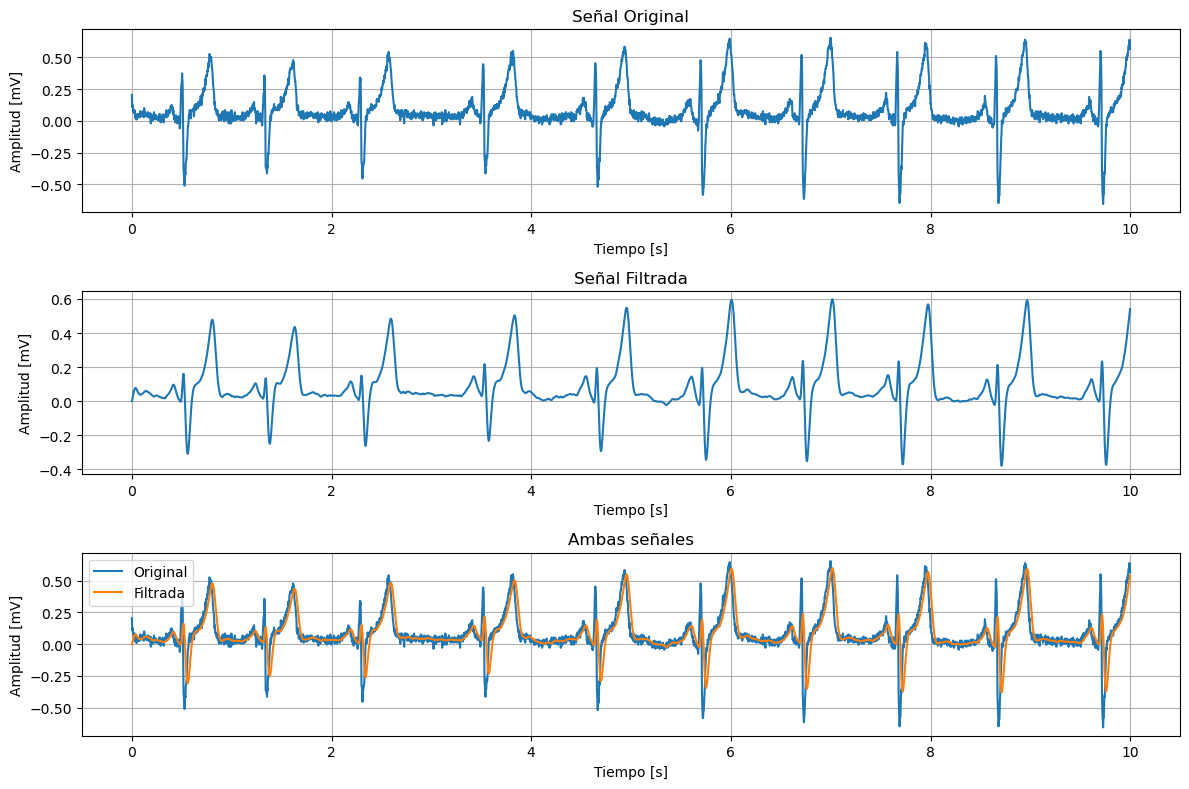

In [17]:
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(time, signalI)
plt.title('Señal Original')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [mV]')
plt.grid("on")

plt.subplot(3, 1, 2)
plt.plot(time, signalI_filt)
plt.title('Señal Filtrada')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [mV]')
plt.grid("on")

plt.subplot(3, 1, 3)
plt.plot(time, signalI)
plt.plot(time, signalI_filt)
plt.legend(['Original','Filtrada'])
plt.title('Ambas señales')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [mV]')
plt.grid("on")

plt.tight_layout()
plt.show()

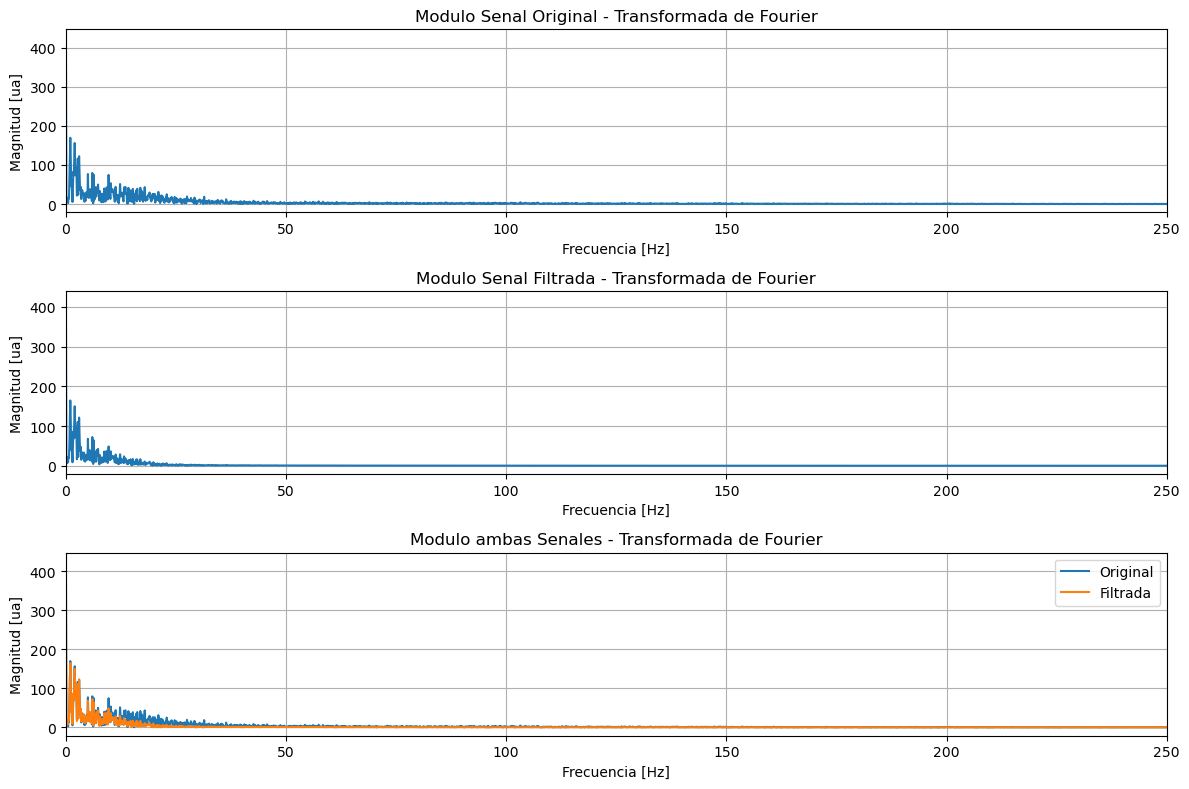

In [16]:
plt.figure(figsize=(12, 8))

# graficamos la magnitud de la transformada de Fourier
plt.subplot(3, 1, 1)
plt.plot(frecs_espectro_orig, np.abs(espectro_orig))
plt.title('Modulo Senal Original - Transformada de Fourier')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud [ua]')
plt.grid("on")
plt.xlim(0, fs/2)  # el gráfico de la transformada (por Nyquist) va a ir de  −𝐹𝑠/2  hasta  𝐹𝑠/2 pero elegimos graficar únicamente las positivas.

# graficamos la fase de la transformada de Fourier
plt.subplot(3, 1, 2)
plt.plot(frecs_espectro_filt, np.abs(espectro_filt))
plt.title('Modulo Senal Filtrada - Transformada de Fourier')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud [ua]')
plt.grid("on")
plt.xlim(0, fs/2)  # el gráfico de la transformada (por Nyquist) va a ir de  −𝐹𝑠/2  hasta  𝐹𝑠/2 pero elegimos graficar únicamente las positivas.

# graficamos la fase de la transformada de Fourier
plt.subplot(3, 1, 3)
plt.plot(frecs_espectro_orig, np.abs(espectro_orig))
plt.plot(frecs_espectro_filt, np.abs(espectro_filt))
plt.legend(['Original', 'Filtrada'])
plt.title('Modulo ambas Senales - Transformada de Fourier')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud [ua]')
plt.grid("on")
plt.xlim(0, fs/2)  # el gráfico de la transformada (por Nyquist) va a ir de  −𝐹𝑠/2  hasta  𝐹𝑠/2 pero elegimos graficar únicamente las positivas.

plt.tight_layout()
plt.show()